### Creating Merged Excel File

In [1]:
import pandas as pd

#File path
excel_file_path = 'Excel_files/Task_Data_Scientist_Dataset.xlsx'

# Make excel sheets into dataframes
df_sheet1 = pd.read_excel(excel_file_path, sheet_name='Soc_Dem')
df_sheet2 = pd.read_excel(excel_file_path, sheet_name='Products_ActBalance')
df_sheet3 = pd.read_excel(excel_file_path, sheet_name='Inflow_Outflow')
df_sheet4 = pd.read_excel(excel_file_path, sheet_name='Sales_Revenues')

# Merging the Dataframes based on the column 'Client'
df = pd.merge(df_sheet1, df_sheet2, on='Client', how='outer')
df = pd.merge(df, df_sheet3, on='Client', how='outer')
df = pd.merge(df, df_sheet4, on='Client', how='outer')

df.head()


,Client,Sex,Age,Tenure,Count_CA,Count_SA,Count_MF,Count_OVD,Count_CC,Count_CL,...,TransactionsDeb_CA,TransactionsDebCash_Card,TransactionsDebCashless_Card,TransactionsDeb_PaymentOrder,Sale_MF,Sale_CC,Sale_CL,Revenue_MF,Revenue_CC,Revenue_CL
0,909,M,21,27,1,NaN,NaN,1.0,NaN,1.0,...,7.0,1.0,0.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN
1,1217,M,38,165,1,NaN,NaN,NaN,NaN,NaN,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.000000,0.000000,0.0
2,850,F,49,44,1,NaN,NaN,NaN,NaN,NaN,...,6.0,0.0,0.0,1.0,0.0,1.0,0.0,0.000000,0.893929,0.0
3,1473,M,54,34,1,1.0,NaN,NaN,1.0,1.0,...,38.0,1.0,26.0,11.0,1.0,0.0,0.0,4.929643,0.000000,0.0
4,1038,M,29,106,1,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0


In [2]:
import os

current_directory = os.getcwd()
output_folder_path = 'Excel_files'

# Generating a new excel file with the corresponding excel folder
output_excel_path = os.path.join(output_folder_path, 'Final_dataset.xlsx')

df.to_excel(output_excel_path, index=False)

### Exploring Dataset

#### Unique Values

In [3]:
# Verifying any duplicate data

duplicate_rows = df[df.duplicated()]
duplicate_rows

,Client,Sex,Age,Tenure,Count_CA,Count_SA,Count_MF,Count_OVD,Count_CC,Count_CL,...,TransactionsDeb_CA,TransactionsDebCash_Card,TransactionsDebCashless_Card,TransactionsDeb_PaymentOrder,Sale_MF,Sale_CC,Sale_CL,Revenue_MF,Revenue_CC,Revenue_CL


In [4]:
# Iterate through each feature and see how many unique values there are

for feature in df.columns:
    unique_values = df[feature].unique()
    
    if len(unique_values) < 20:
        print(f"{feature}:\n{unique_values}\n")
    else:
        print(f"{feature}: {len(unique_values)} unique values\n")


Client: 1615 unique values

Sex:
['M' 'F' nan]

Age: 94 unique values

Tenure: 248 unique values

Count_CA:
[1 2 3 4]

Count_SA:
[nan  1.  3.  2.  5.]

Count_MF: 30 unique values

Count_OVD:
[ 1. nan]

Count_CC:
[nan  1.]

Count_CL:
[ 1. nan  2.  3.  5.]

ActBal_CA: 1514 unique values

ActBal_SA: 412 unique values

ActBal_MF: 191 unique values

ActBal_OVD: 122 unique values

ActBal_CC: 122 unique values

ActBal_CL: 136 unique values

VolumeCred: 1491 unique values

VolumeCred_CA: 1433 unique values

TransactionsCred: 46 unique values

TransactionsCred_CA: 37 unique values

VolumeDeb: 1440 unique values

VolumeDeb_CA: 1426 unique values

VolumeDebCash_Card: 262 unique values

VolumeDebCashless_Card: 875 unique values

VolumeDeb_PaymentOrder: 1067 unique values

TransactionsDeb: 87 unique values

TransactionsDeb_CA: 72 unique values

TransactionsDebCash_Card: 20 unique values

TransactionsDebCashless_Card: 48 unique values

TransactionsDeb_PaymentOrder: 31 unique values

Sale_MF:
[nan  0

#### Missing Values

In [5]:
percent_missing = round(df.isnull().sum() * 100 / len(df),2)
missing_value_df = pd.DataFrame({'Missing_Percentage': percent_missing})
missing_value_df.sort_values(by="Missing_Percentage",ascending=False)


,Missing_Percentage
ActBal_CL,91.64
Count_CL,91.64
ActBal_CC,89.47
Count_CC,89.47
ActBal_MF,81.05
Count_MF,81.05
Count_OVD,74.06
ActBal_OVD,74.06
ActBal_SA,73.62
Count_SA,73.62


In [6]:
# Removing the missing values from columns that are < 2%

feature_drop = ['VolumeDebCashless_Card',
'TransactionsDeb_PaymentOrder',
'TransactionsDebCashless_Card',	
'TransactionsDebCash_Card',
'TransactionsDeb_CA',
'TransactionsDeb',	
'VolumeDeb_PaymentOrder',
'TransactionsCred',
'VolumeDebCash_Card',
'VolumeDeb_CA',
'VolumeDeb',
'TransactionsCred_CA',	
'VolumeCred_CA',
'VolumeCred',
'Sex']

df = df.dropna(subset = feature_drop)


In [7]:
percent_missing = round(df.isnull().sum() * 100 / len(df),2)
missing_value_df = pd.DataFrame({'Missing_Percentage': percent_missing})
missing_value_df.sort_values(by="Missing_Percentage",ascending=False)

,Missing_Percentage
ActBal_CL,91.48
Count_CL,91.48
ActBal_CC,89.27
Count_CC,89.27
ActBal_MF,80.74
Count_MF,80.74
Count_OVD,73.55
ActBal_OVD,73.55
ActBal_SA,73.17
Count_SA,73.17


##### KNNImputer

#### Age Anomalies

In [8]:
# Verify when Tenure in years is larger than Age

anomaly_tenure = df['Tenure']/12 > df['Age']

print("Number of anomalies:", anomaly_tenure.sum())


# drop rows in which tenure (in years) is larger than age

df.drop(df[anomaly_tenure].index, inplace=True)


Number of anomalies: 47


In [15]:
# Remove the rows where Age is less than 10 years old

age_threshold = df['Age'] < 10
print("Underage clients:", age_threshold.sum())

#drop rows where clients are too young
df.drop(df[age_threshold].index, inplace=True)

Underage clients: 14


In [16]:
df.describe()

,Client,Age,Tenure,Count_CA,Count_SA,Count_MF,Count_OVD,Count_CC,Count_CL,ActBal_CA,...,TransactionsDeb_CA,TransactionsDebCash_Card,TransactionsDebCashless_Card,TransactionsDeb_PaymentOrder,Sale_MF,Sale_CC,Sale_CL,Revenue_MF,Revenue_CC,Revenue_CL
count,1523.000000,1523.000000,1523.000000,1523.000000,410.000000,294.000000,397.0,164.0,129.000000,1523.000000,...,1523.000000,1523.000000,1523.000000,1523.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000
mean,802.608667,44.251477,100.300066,1.080762,1.163415,4.336735,1.0,1.0,1.193798,2471.279146,...,13.648063,2.005909,5.262640,4.648720,0.206174,0.251378,0.291069,2.031117,2.829950,3.434934
std,466.237289,17.403548,64.462765,0.337209,0.463987,6.930583,0.0,0.0,0.531471,7217.407781,...,13.049521,2.727066,8.435538,5.248056,0.404780,0.434045,0.454506,10.260022,18.271348,7.610139
min,1.000000,10.000000,0.000000,1.000000,1.000000,1.000000,1.0,1.0,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,401.500000,30.000000,44.000000,1.000000,1.000000,1.000000,1.0,1.0,1.000000,61.177679,...,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,802.000000,42.000000,96.000000,1.000000,1.000000,2.000000,1.0,1.0,1.000000,465.546786,...,10.000000,1.000000,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1206.500000,58.000000,151.000000,1.000000,1.000000,4.000000,1.0,1.0,1.000000,2178.271607,...,19.000000,3.000000,7.000000,7.000000,0.000000,1.000000,1.000000,0.000000,0.142857,4.250000
max,1614.000000,97.000000,273.000000,4.000000,5.000000,79.000000,1.0,1.0,5.000000,171575.889643,...,83.000000,25.000000,60.000000,34.000000,1.000000,1.000000,1.000000,220.488214,407.962500,133.275357


#### Data Types

In [10]:
df[df.columns[:18]].info()

<class 'pandas.core.frame.DataFrame'>
Index: 1537 entries, 0 to 1614
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Client         1537 non-null   int64  
 1   Sex            1537 non-null   object 
 2   Age            1537 non-null   int64  
 3   Tenure         1537 non-null   int64  
 4   Count_CA       1537 non-null   int64  
 5   Count_SA       411 non-null    float64
 6   Count_MF       297 non-null    float64
 7   Count_OVD      402 non-null    float64
 8   Count_CC       166 non-null    float64
 9   Count_CL       130 non-null    float64
 10  ActBal_CA      1537 non-null   float64
 11  ActBal_SA      411 non-null    float64
 12  ActBal_MF      297 non-null    float64
 13  ActBal_OVD     402 non-null    float64
 14  ActBal_CC      166 non-null    float64
 15  ActBal_CL      130 non-null    float64
 16  VolumeCred     1537 non-null   float64
 17  VolumeCred_CA  1537 non-null   float64
dtypes: float64(13

In [11]:
df[df.columns[18:]].info()

<class 'pandas.core.frame.DataFrame'>
Index: 1537 entries, 0 to 1614
Data columns (total 18 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   TransactionsCred              1537 non-null   float64
 1   TransactionsCred_CA           1537 non-null   float64
 2   VolumeDeb                     1537 non-null   float64
 3   VolumeDeb_CA                  1537 non-null   float64
 4   VolumeDebCash_Card            1537 non-null   float64
 5   VolumeDebCashless_Card        1537 non-null   float64
 6   VolumeDeb_PaymentOrder        1537 non-null   float64
 7   TransactionsDeb               1537 non-null   float64
 8   TransactionsDeb_CA            1537 non-null   float64
 9   TransactionsDebCash_Card      1537 non-null   float64
 10  TransactionsDebCashless_Card  1537 non-null   float64
 11  TransactionsDeb_PaymentOrder  1537 non-null   float64
 12  Sale_MF                       915 non-null    float64
 13  Sale_CC 

### Feature Engineering

In [12]:
# Numerical features
numerical_features = df.select_dtypes(include=['number']).columns.tolist()

# Categorical features
categorical_features = df.select_dtypes(include=['object']).columns.tolist()


print("Numerical Features:\n",numerical_features)
print("Categorical Features:\n",categorical_features)



Numerical Features:
 ['Client', 'Age', 'Tenure', 'Count_CA', 'Count_SA', 'Count_MF', 'Count_OVD', 'Count_CC', 'Count_CL', 'ActBal_CA', 'ActBal_SA', 'ActBal_MF', 'ActBal_OVD', 'ActBal_CC', 'ActBal_CL', 'VolumeCred', 'VolumeCred_CA', 'TransactionsCred', 'TransactionsCred_CA', 'VolumeDeb', 'VolumeDeb_CA', 'VolumeDebCash_Card', 'VolumeDebCashless_Card', 'VolumeDeb_PaymentOrder', 'TransactionsDeb', 'TransactionsDeb_CA', 'TransactionsDebCash_Card', 'TransactionsDebCashless_Card', 'TransactionsDeb_PaymentOrder', 'Sale_MF', 'Sale_CC', 'Sale_CL', 'Revenue_MF', 'Revenue_CC', 'Revenue_CL']
Categorical Features:
 ['Sex']


#### Numerical Features

<Axes: xlabel='Age', ylabel='Density'>

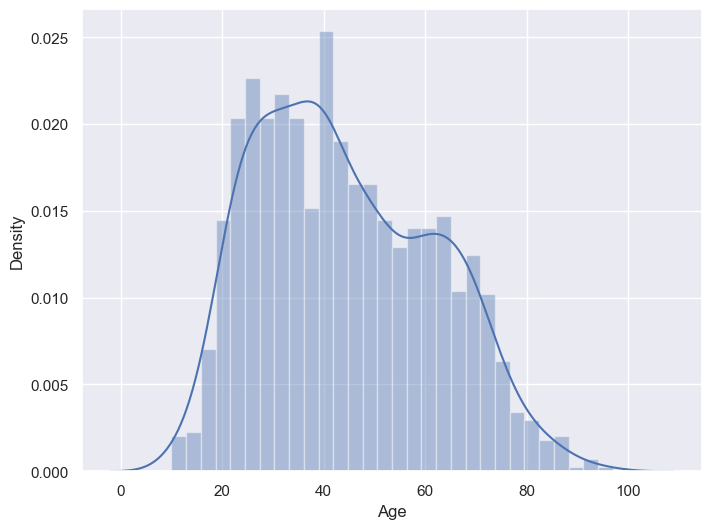

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

''' What does a density plot show?'''

sns.set_style('darkgrid')
sns.set(rc={'figure.figsize':(8,6)})
sns.distplot(df.Age, bins=30)


In [13]:
#df= pd.get_dummies(df,columns=['Sex'])
